# In this notebook we are going to create a Polynomial linear regression model using python
In this lesson our task is to build a prediction model to predict the salary of an employee(Level) knowing his/her years of experience and also visual the polynomial regression curve with different degrees . So carefully understand the dataset provided "Position_Salaries.csv". Now ,we will build our model let's get started !!

First we wil start with importing some libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data=pd.read_csv('Position_Salaries.csv')
# print (data)
x= data.iloc[:,1:2].values
# print(x)
y=data.iloc[:,2].values

Currently,if you have followed the mentioned order of lessons you guys should know what we are doing here.

In [4]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


As we can see the salary column is our output column(dependent variable) and level is our input column(independent variable1) and position is just a redundant column. So, we will pe predicting salary for every corresponding level.

In [8]:
data.count().isnull()

Position    False
Level       False
Salary      False
dtype: bool

Here we don't need to use imputer because there is no null(NAN) value in our dataset and also we don't need to use encoder as there is no categorical column in our variables.

Now , we need to scale the data as the range of our data is very large and unevenly distributed but we won't because our LinearRegression class that we are calling in the next cell automatically handles the scaling of data for us.

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Above we have created a Simple linear regression model . So, we can compare it with our polynomial linear regression model

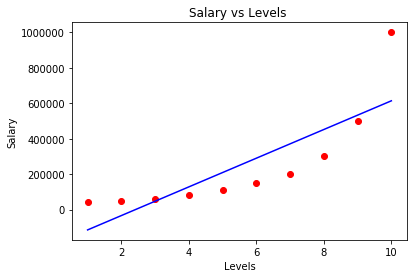

In [12]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg.predict(x),color='blue')
plt.title('Salary vs Levels ')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()

Above we have plotted the output of our simple LR and as we can see it is not doing a great job for such dataset.
So, we will try with our Poly. LR

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x)
lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Above we have import the polynomial features class using which we will the create an x_poly variable (Poly LR is a LR with the degree n of same input variable)

Now we will plot this poly LR of degree =2

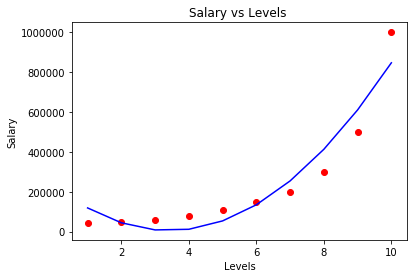

In [20]:

plt.scatter(x,y,color='red')
plt.plot(x,lin_reg_2.predict(x_poly),color='blue')
plt.title('Salary vs Levels ')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()

So, our model is doing a slightly better job then the last one but the curve is not smooth because it is only predicting the values for the certain x_poly inputs and joining the rest with a straight line to complete the graph . To get smoothness we will predict the output for every small interval of values

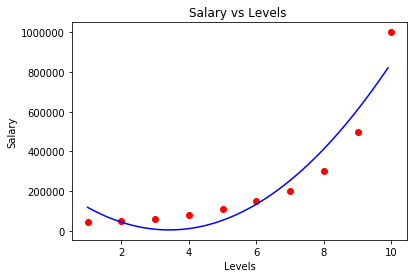

In [21]:
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,lin_reg_2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title('Salary vs Levels ')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()

Huhh!!, we create an array of inputs with small interval(0.1) and predict output for each so we get a smooth curve

Now , we will increase the degree and see how it goes ...
with degree=3

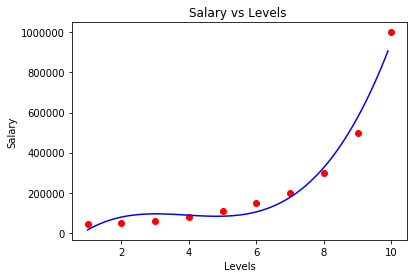

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x)
lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly,y)
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,lin_reg_2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title('Salary vs Levels ')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()

So, we get a more accurate curve as we increase the degree.
let's try for degree =4

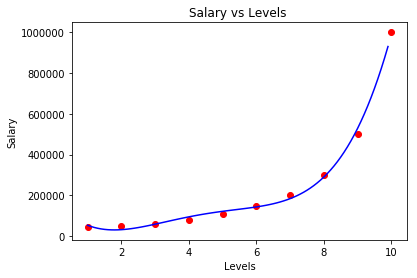

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)
lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly,y)
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,lin_reg_2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title('Salary vs Levels ')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()

I hope you have understand the concept well enough . In some cases simple LR gives more accurate result , it's basically depends on your dataset.